In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
visa = pd.read_csv(r"D:\Study material\Omkar sir\Visadataset.csv")
visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Divide into Categorical and Numerical columns**

In [3]:
types = dict(visa.dtypes)
cat_col = [key for key, value in types.items() if value=='object']
num_col = [key for key,value in types.items() if value=='object']

In [4]:
cat_col = visa.select_dtypes(include = 'object')
num_col = visa.select_dtypes(exclude = 'object')
cat_col

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,West,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,Northeast,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,West,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,West,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,South,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,South,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,Northeast,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,South,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,West,Year,Y,Certified


In [5]:
num_col

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


**How to select a specific columns**

In [6]:
visa[['prevailing_wage']] # dataFrame
visa.loc[:,['prevailing_wage']] 
visa.prevailing_wage # series type
visa['prevailing_wage'] # list

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [7]:
visa['prevailing_wage'] # series

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

In [8]:
visa.loc[:,['prevailing_wage']]

,prevailing_wage
0,592.2029
1,83425.6500
2,122996.8600
3,83434.0300
4,149907.3900
...,...
25475,77092.5700
25476,279174.7900
25477,146298.8500
25478,86154.7700


In [9]:
visa[['prevailing_wage','has_job_experience']] # Multipe columns.

,prevailing_wage,has_job_experience
0,592.2029,N
1,83425.6500,Y
2,122996.8600,N
3,83434.0300,N
4,149907.3900,Y
...,...,...
25475,77092.5700,Y
25476,279174.7900,Y
25477,146298.8500,Y
25478,86154.7700,Y


**Task number-1**

    - we want to find the number of applicants continent wise
    - There is a Asia continet is there
    - how many applicant are from the Asia out of 25000.

**Unique method**

    - unique will provide how many unique items are there in a particular column.

In [10]:
visa['continent'].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

In [11]:
len(visa['continent'].unique())

6

**unique**
    
    - gives count of uniqe items

In [12]:
visa['continent'].nunique() # nunique also give the count of items

6

In [13]:
# Step-1 : read the data with specific column.
# Step-2 : Appy the condition
    # When we apply the condition python will give the True and False
# Step-3 : In order to retrive the True data
    # dataframe_name[con]

In [14]:
con = visa['continent'] == 'Asia'

In [15]:
visa[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [36]:
con = visa['continent'] == 'Asia'
visa[con]

con = visa['continent'] == 'Africa'
visa[con]

con = visa['continent'] == 'North Africa'
visa[con]

con = visa['continent'] == 'Oceania'
visa[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
241,EZYV242,Oceania,Doctorate,Y,N,2871,2009,South,56606.54,Month,Y,Certified
288,EZYV289,Oceania,Bachelor's,N,N,2288,2011,West,82385.60,Year,Y,Denied
708,EZYV709,Oceania,Bachelor's,N,N,3227,1928,Midwest,92422.74,Year,Y,Certified
955,EZYV956,Oceania,Master's,N,N,17541,1986,Northeast,75224.53,Year,Y,Denied
960,EZYV961,Oceania,Bachelor's,N,N,363,2013,Northeast,97469.69,Year,Y,Denied
...,...,...,...,...,...,...,...,...,...,...,...,...
24865,EZYV24866,Oceania,Doctorate,N,Y,3487,1930,West,59969.55,Year,Y,Denied
25150,EZYV25151,Oceania,Master's,Y,N,1076,1869,Northeast,87467.12,Year,N,Certified
25196,EZYV25197,Oceania,Bachelor's,Y,N,385,2000,South,94420.47,Year,Y,Certified
25404,EZYV25405,Oceania,Doctorate,Y,N,429,2006,West,27819.35,Year,Y,Certified


In [35]:
for i in visa['continent'].unique():
    con = visa['continent']==i
    count = len(visa[con])
    print(f"The number of applicants from {i} is : {count} ")

The number of applicants from Asia is : 16861 
The number of applicants from Africa is : 551 
The number of applicants from North America is : 3292 
The number of applicants from Europe is : 3732 
The number of applicants from South America is : 852 
The number of applicants from Oceania is : 192 


**Task_ no-2**

    - now instead of print count , take empty list 
    - save the values in a empty list
    - we already has unique continent list 
    - we also having count list
    - create a DataFrame

In [34]:
continents = visa['continent'].unique()
count = []
for i in visa['continent'].unique():
    con = visa['continent']==i
    count.append(len(visa[con]))

In [19]:
continent_df = pd.DataFrame(zip(continents,count),columns = ['Continent','Number of applicants'])
continent_df

continent_df.to_csv('Continent_set.csv',index = False)

In [33]:
visa['continent'].value_counts() # in one line

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [32]:
continenet_df = pd.read_csv(r"Continent_set.csv")
continenet_df

,Continent,Number of applicants
0,Asia,16861
1,Africa,551
2,North America,3292
3,Europe,3732
4,South America,852
5,Oceania,192


In [22]:
- we created a dataFrame of unique value of columns and its count 
- we created by our own way by using for loop
- the same operation we can get using value_counts

SyntaxError: invalid syntax (1298695499.py, line 1)

In [ ]:
# cdf = visa['continent'].value_counts()
# cdf

In [28]:
dir(cdf)

['Certified',
 'Denied',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__column_consortium_standard__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__'

In [ ]:
# keys = cdf.keys()

In [ ]:
# values = cdf.values

In [29]:
cdf = visa['continent'].value_counts()
cdf
keys = cdf.keys()
values = cdf.values
df = pd.DataFrame(zip(keys,values),
                  columns=['Lables','Counts'])

df.to_csv('Continent.csv',index = False)

In [31]:
df

,Lables,Counts
0,Asia,16861
1,Europe,3732
2,North America,3292
3,South America,852
4,Africa,551
5,Oceania,192


In [30]:
visa.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [27]:
cdf = visa['education_of_employee'].value_counts()
cdf
keys = cdf.keys()
values = cdf.values
df = pd.DataFrame(zip(keys,values),
                  columns=['Lables','Counts'])

df.to_csv('education.csv',index = False)


cdf = visa['has_job_experience'].value_counts()
cdf
keys = cdf.keys()
values = cdf.values
df = pd.DataFrame(zip(keys,values),
                  columns=['Lables','Counts'])

df.to_csv('job experience.csv',index = False)


cdf = visa['requires_job_training'].value_counts()
cdf
keys = cdf.keys()
values = cdf.values
df = pd.DataFrame(zip(keys,values),
                  columns=['Lables','Counts'])

df.to_csv('job Rating.csv',index = False)



cdf = visa['region_of_employment'].value_counts()
cdf
keys = cdf.keys()
values = cdf.values
df = pd.DataFrame(zip(keys,values),
                  columns=['Lables','Counts'])

df.to_csv('region.csv',index = False)



cdf = visa['prevailing_wage'].value_counts()
cdf
keys = cdf.keys()
values = cdf.values
df = pd.DataFrame(zip(keys,values),
                  columns=['Lables','Counts'])

df.to_csv('previling.csv',index = False)


cdf = visa['unit_of_wage'].value_counts()
cdf
keys = cdf.keys()
values = cdf.values
df = pd.DataFrame(zip(keys,values),
                  columns=['Lables','Counts'])

df.to_csv('unit.csv',index = False)



cdf = visa['full_time_position'].value_counts()
cdf
keys = cdf.keys()
values = cdf.values
df = pd.DataFrame(zip(keys,values),
                  columns=['Lables','Counts'])

df.to_csv('time.csv',index = False)



cdf = visa['case_status'].value_counts()
cdf
keys = cdf.keys()
values = cdf.values
df = pd.DataFrame(zip(keys,values),
                  columns=['Lables','Counts'])

df.to_csv('case status.csv',index = False)


In [26]:
pd.read_csv('case status.csv')
pd.read_csv('time.csv')
pd.read_csv('unit.csv')
pd.read_csv('previling.csv')
pd.read_csv('region.csv')
pd.read_csv('job Rating.csv')
pd.read_csv('job experience.csv')

,Lables,Counts
0,Y,14802
1,N,10678


In [ ]:
# In a few line we can make the DataFrame

for i in cat_col[1:]:
    cdf = visa[i].value_counts()
    keys = cdf.keys()
    value = cdf.values
    col = ['Lables','Count']
    df = pd.DataFrame(zip(keys,value),
                     columns = col)
    path = r"D:\New folder (2)"
    df.to_csv(f"{path}\\{i}.csv",index = False)

$Normalize$

    - Relative frequency table
    - Will give percentage of lables in the columns

In [25]:

cdf = visa['continent'].value_counts(normalize = True)
round(cdf*100,2)

continent
Asia             66.17
Europe           14.65
North America    12.92
South America     3.34
Africa            2.16
Oceania           0.75
Name: proportion, dtype: float64

$Bar chat$

    - Bar chart is the graphical representation of frequency table

    - Bar graph is a plot betweeen count and class

    - In order to plot a bar chart we required two column
        - catergorical column
        - numberical column

    - We already created a frequency table for **continent_df**

    - Here we have a cols = ['continents','Number of Applicants']

    * Categrorical column : Continents
    * Numerical column : Number of Applicant 

**Package name: matplotlib**

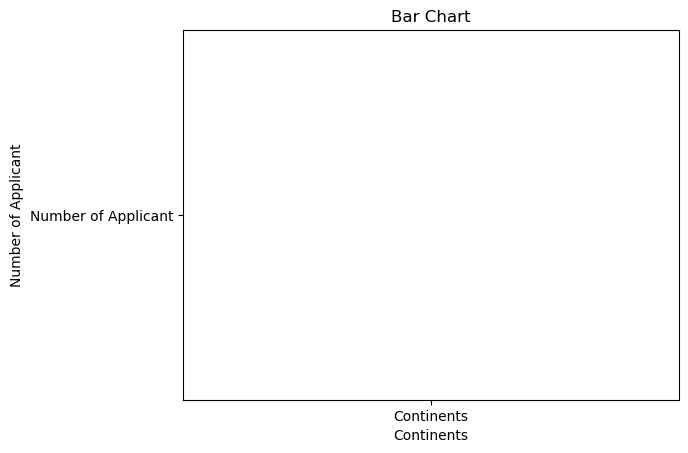

In [23]:
import matplotlib.pyplot as plt
plt.bar('Continents','Number of Applicant',
       data=continenet_df )

plt.title('Bar Chart')
plt.xlabel('Continents')
plt.savefig('Continents_bar_chart.jpg')
plt.ylabel('Number of Applicant')

plt.show() # show will avoid the writeup and it should be last